# Getting all required pkgs

In [43]:
import pandas as pd
import urllib
import os
import tarfile
import numpy as np

# downlaod path for data

In [3]:
download_root_path='https://raw.githubusercontent.com/ageron/handson-ml2/master/'
housing_path=os.path.join('datasets','hosuing')
housing_url=download_root_path + "datasets/housing/housing.tgz"

# Function to fetch data from URL

In [4]:
def get_housing_data(url=housing_url,path=housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Store the data in local machine at given path 

In [5]:
get_housing_data(url=housing_url,path=housing_path)

# Function to read data (csv file) stored at loacl filesystem and return pandas dataframe

In [6]:
def load_housing_data(path=housing_path):
    csv_path=os.path.join(housing_path,"housing.csv")
    print('California housing data has been loaded into dataframe from ' + csv_path)
    return pd.read_csv(csv_path)

In [7]:
calh = load_housing_data(path=housing_path)

California housing data has been loaded into dataframe from datasets/hosuing/housing.csv


In [199]:
calh.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3          4  
4          3

In [202]:
calh.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [9]:
calh.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# ocean_proximity has an object (non numeric) values and total_bedrooms having missing values

# Lets check the type of values in ocean_proximity

In [10]:
calh['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Lets do some visuialization with histgram to observe value counts for each numerical values 

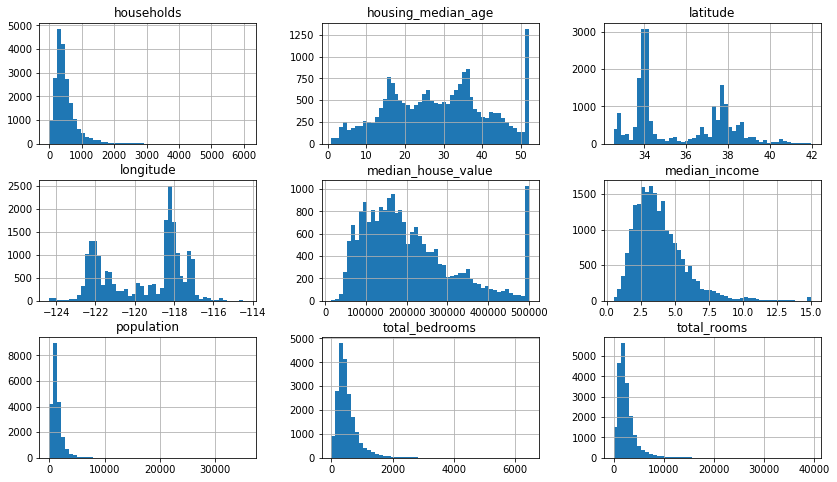

In [17]:
import matplotlib.pyplot as plt
calh.hist(bins=50,figsize=(14,8))
plt.show()

# Now dividing training and testing dataset from our main datset 

In [12]:
from sklearn.model_selection import train_test_split


# Purely random sampling method good if there is large data set is avaialbe as compared to number of features

# keeping a random state fix for a while to get the same data in trainging an testing data sets everytime when we use test train split 

In [18]:
training_set, testing_set = train_test_split(calh, test_size=0.2, random_state=50)

In [35]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 4450 to 14000
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16351 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [36]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 1945 to 12959
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4082 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [37]:
print('{0} Null values for total_bedrooms in Training set '.format(training_set.shape[0] -  training_set['total_bedrooms'].count())) 

161 Null values for total_bedrooms in Training set 


In [38]:
print('{0} Null values for total_bedrooms in Testing set '.format(testing_set.shape[0] -  testing_set['total_bedrooms'].count())) 

46 Null values for total_bedrooms in Testing set 


# Stratified Sampling : The population is divided into homogeneous subgroups called strata

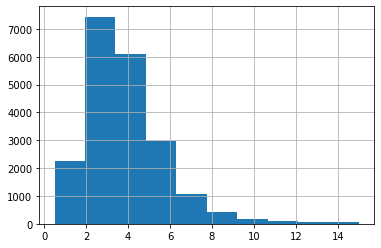

In [40]:
calh["median_income"].hist()

let's create a new feature

In [59]:
calh["income_cat"] = pd.cut(calh["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

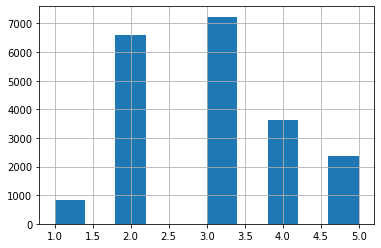

In [64]:
calh['income_cat'].hist()

In [61]:
calh["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [65]:
#calh.drop(columns= ['income_category'],inplace=True) mistakenly created column

In [117]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size = 0.2 , random_state= 50)

for train_index, test_index in split.split(calh,calh['income_cat']):
    strat_train_set = calh.loc[train_index]
    strat_test_set = calh.loc[test_index]

In [118]:
strat_train_set.shape

(16512, 11)

In [119]:
strat_test_set.shape

(4128, 11)

In [123]:
calh["income_cat"].value_counts() / len(calh)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [122]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [124]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

# Lets see the comaprision between complete Random sampling and Stratified sampling 

In [125]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

training_set, testing_set = train_test_split(calh, test_size=0.2, random_state=50)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(calh),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(testing_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [126]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039729  0.041667      4.622871      -0.243309
2  0.318847    0.318798  0.319767      0.288710      -0.015195
3  0.350581    0.350533  0.336967     -3.883361      -0.013820
4  0.176308    0.176357  0.179264      1.676285       0.027480
5  0.114438    0.114583  0.122335      6.900931       0.127011

In [127]:
strat_train_set.drop (columns = ['income_cat'], inplace = True)

In [128]:
strat_test_set.drop (columns = ['income_cat'], inplace = True)

In [129]:
start_train_set.shape # final trainig set 

(16512, 10)

In [130]:
strat_test_set.shape # final testing set 

(4128, 10)

# Visualization

In [132]:
housing = strat_train_set.copy()

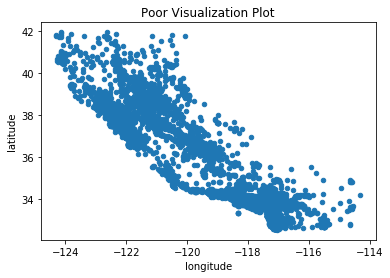

In [137]:
housing.plot(kind="scatter", x="longitude", y="latitude", title = "Poor Visualization Plot");

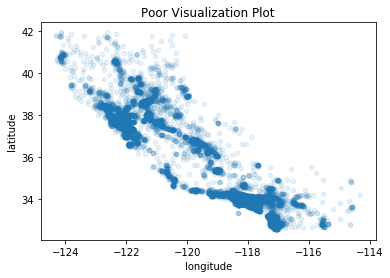

In [148]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, title = "Poor Visualization Plot");

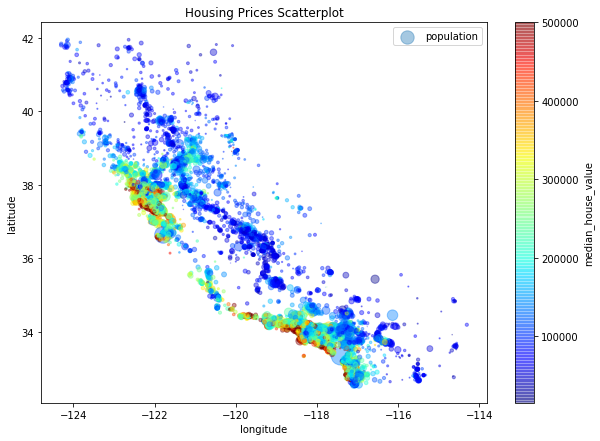

In [152]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False,title = 'Housing Prices Scatterplot')
plt.legend();

In [154]:
PROJECT_ROOT_DIR = "."
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f3e94427290>)

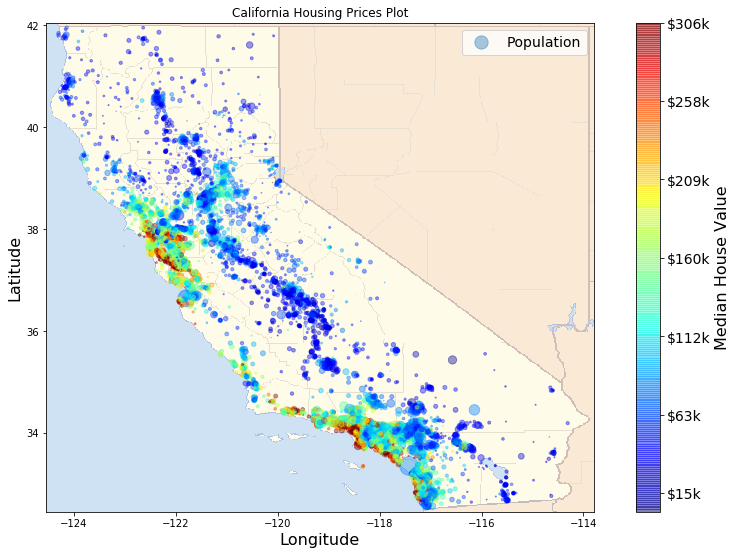

In [165]:
import matplotlib.image as mpimg

california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(15,9),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,title = 'California Housing Prices Plot'
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=16)
plt.xlabel("Longitude", fontsize=16)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=14)
#save_fig("california_housing_prices_plot")
plt.show()

In [167]:
housing.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924749           -0.106224     0.046105   
latitude            -0.924749  1.000000            0.007783    -0.037959   
housing_median_age  -0.106224  0.007783            1.000000    -0.362351   
total_rooms          0.046105 -0.037959           -0.362351     1.000000   
total_bedrooms       0.070305 -0.069087           -0.321197     0.929724   
population           0.101097 -0.109535           -0.295260     0.854847   
households           0.057866 -0.073841           -0.304156     0.918283   
median_income       -0.016913 -0.076061           -0.117224     0.201811   
median_house_value  -0.048513 -0.140663            0.103783     0.137060   

                    total_bedrooms  population  households  median_income  \
longitude                 0.070305    0.101097    0.057866      -0.016913   
latitude                 -0.069087   -0.109535   -0.073841      -0.076061   
housing_median_age       -0.321197   -0.295260   -0.304156      -0.117224   
total_rooms               0.929724    0.854847    0.918283       0.201811   
total_bedrooms            1.000000    0.877931    0.980594      -0.005850   
population                0.877931    1.000000    0.906528       0.005653   
households                0.980594    0.906528    1.000000       0.014213   
median_income            -0.005850    0.005653    0.014213       1.000000   
median_house_value        0.052708   -0.024807    0.066502       0.686930   

                    median_house_value  
longitude                    -0.048513  
latitude                     -0.140663  
housing_median_age            0.103783  
total_rooms                   0.137060  
total_bedrooms                0.052708  
population                   -0.024807  
households                    0.066502  
median_income                 0.686930  
median_house_value            1.000000

In [176]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686930
total_rooms           0.137060
housing_median_age    0.103783
households            0.066502
total_bedrooms        0.052708
population           -0.024807
longitude            -0.048513
latitude             -0.140663
Name: median_house_value, dtype: float64

# Lets check Coorelation between the features and figure out most imp feature for Median House Values 

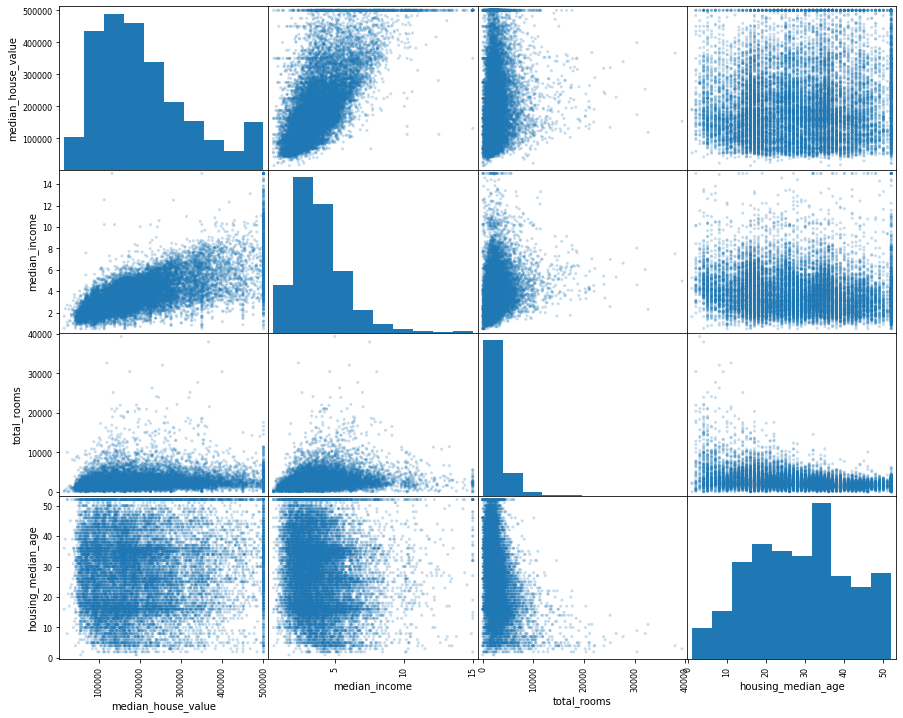

In [195]:
'''# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age",]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot") '''


from pandas.plotting import scatter_matrix
scatter_matrix(housing[["median_house_value", "median_income", "total_rooms","housing_median_age"]],
               figsize=(15,12),alpha= 0.25);


# Most correlated feature is median income 

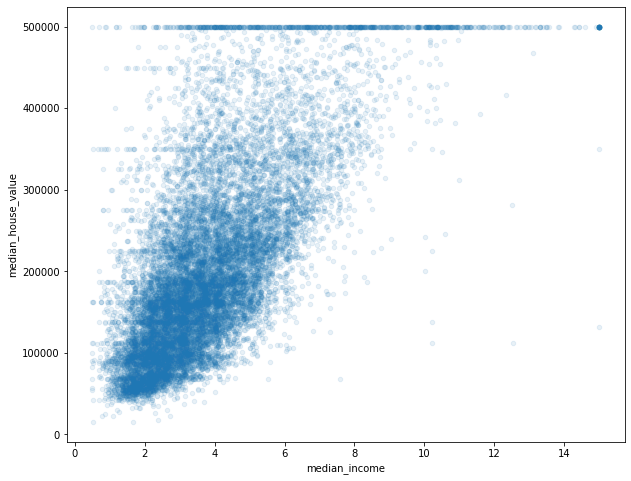

In [198]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1,figsize=(10,8));


# Experimental Attribute Combinations

In [203]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [206]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686930
rooms_per_household         0.151308
total_rooms                 0.137060
housing_median_age          0.103783
households                  0.066502
total_bedrooms              0.052708
population                 -0.024807
population_per_household   -0.027231
longitude                  -0.048513
latitude                   -0.140663
bedrooms_per_room          -0.255816
Name: median_house_value, dtype: float64

# bedrooms_per_room having some beeter Negative correlation -0.255816

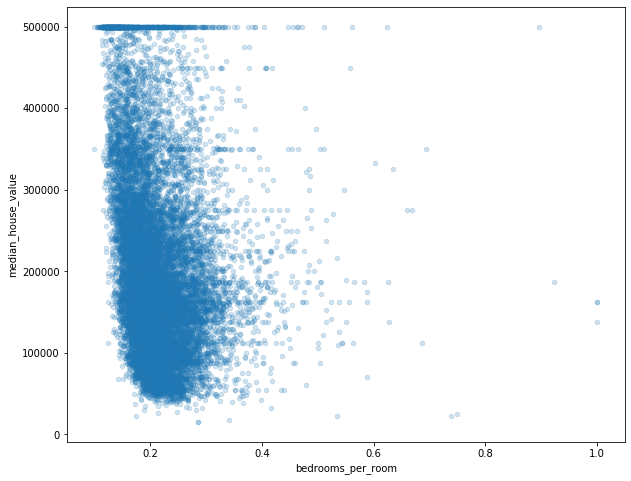

In [222]:
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value",alpha=.2,figsize=(10,8));

# Data preparation

In [223]:
housing = start_train_set.drop("median_house_value", axis=1)
housing_lebels= strat_train_set["median_house_value"].copy()

In [226]:
housing.info() # we have data impurities with total_bedrooms with some missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17055 to 2387
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16350 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


# Lets fill the missing values with sklearn buitin module

In [246]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

As imputer works with only numeric data type not with objects or categorical values lo lets saprate the both datasets 

In [270]:
housing_num = housing.select_dtypes(exclude=object)
housing_cat = housing.select_dtypes(include=object)

In [271]:
housing_cat

ocean_proximity
17055      NEAR OCEAN
4004        <1H OCEAN
3939        <1H OCEAN
1669         NEAR BAY
17938       <1H OCEAN
...               ...
12614          INLAND
14027      NEAR OCEAN
8914        <1H OCEAN
10521       <1H OCEAN
2387           INLAND

[16512 rows x 1 columns]

In [272]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [273]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2131.    ,  435.    , 1166.    ,
        410.    ,    3.5385])

In [274]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2131.    ,  435.    , 1166.    ,
        410.    ,    3.5385])

# "statistics_" attribute shows the median value for every df columns as strategy has been set as 'median'

Transforming Training Numeric dataset 

In [275]:
X = imputer.transform(housing_num)

In [276]:
type(X) # Numpy Nth dirmntion (mutidimentinal) array 

numpy.ndarray

In [279]:
len(X)

16512

In [280]:
X

array([[-122.25  ,   37.47  ,   35.    , ..., 1313.    ,  487.    ,
           5.9062],
       [-118.61  ,   34.15  ,   32.    , ..., 1696.    ,  749.    ,
           4.9102],
       [-118.58  ,   34.21  ,   27.    , ..., 1034.    ,  344.    ,
           4.7125],
       ...,
       [-118.46  ,   34.03  ,   39.    , ...,  886.    ,  284.    ,
           3.125 ],
       [-117.69  ,   33.55  ,    3.    , ...,  710.    ,  246.    ,
           6.0743],
       [-119.61  ,   36.94  ,   14.    , ...,  315.    ,  135.    ,
           4.2679]])

In [281]:
housing_tr = pd.DataFrame(data=X, columns=housing_num.columns, index=housing.index)

# now all the missing values form numeric data types has been filled with inputer 

In [282]:
housing_tr.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17055 to 2387
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [283]:
housing_cat

ocean_proximity
17055      NEAR OCEAN
4004        <1H OCEAN
3939        <1H OCEAN
1669         NEAR BAY
17938       <1H OCEAN
...               ...
12614          INLAND
14027      NEAR OCEAN
8914        <1H OCEAN
10521       <1H OCEAN
2387           INLAND

[16512 rows x 1 columns]

# Lets change the catogrical or object values with Numeric data

In [314]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()


In [327]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)


In [335]:
type(housing_cat_encoded)

numpy.ndarray

In [332]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One hot encoder is better approach form this 

In [339]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder= OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)


In [340]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [343]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [346]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Now lets create an finction that add new columns attributes

In [366]:
def addition_column_attrib (df):
    #this function will simple add a new attribute i.e. bedrooms_per_room in given dataframe
    df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]

In [368]:
addition_column_attrib(housing_tr)

In [363]:
#housing_tr.drop(columns=['bedrooms_per_room'],inplace = True)

In [370]:
housing_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17055    -122.25     37.47                35.0       3183.0           515.0   
4004     -118.61     34.15                32.0       4491.0           815.0   
3939     -118.58     34.21                27.0       2209.0           353.0   
1669     -122.23     38.06                52.0       1350.0           266.0   
17938    -121.94     37.34                29.0       3377.0           853.0   
...          ...       ...                 ...          ...             ...   
12614    -121.51     38.49                21.0       4426.0           790.0   
14027    -117.15     32.76                37.0       1921.0           502.0   
8914     -118.46     34.03                39.0       1244.0           283.0   
10521    -117.69     33.55                 3.0       1618.0           266.0   
2387     -119.61     36.94                14.0        863.0           151.0   

       population  households  median_income  bedrooms_per_room  
17055      1313.0       487.0         5.9062           0.161797  
4004       1696.0       749.0         4.9102           0.181474  
3939       1034.0       344.0         4.7125           0.159801  
1669        490.0       257.0         3.1250           0.197037  
17938      1674.0       792.0         3.4233           0.252591  
...           ...         ...            ...                ...  
12614      1856.0       761.0         4.1000           0.178491  
14027       811.0       472.0         2.7500           0.261322  
8914        886.0       284.0         3.1250           0.227492  
10521       710.0       246.0         6.0743           0.164400  
2387        315.0       135.0         4.2679           0.174971  

[16512 rows x 9 columns]